https://mp.weixin.qq.com/s?__biz=MzI1MzY0MzE4Mg==&mid=2247485232&idx=1&sn=e83004347d6b5c993af3cfa64f533a0c&chksm=e9d017f1dea79ee7f2e399884b90f3e55c33c1c98747fb55f9a4f5257bcce22374465a344f64&scene=0&xtrack=1&key=786d713ecd0a37577fe24c2318f6f5c4e8d064dd0a8d97bb5ddbebf5dfced4efce1f64c0b9a2882198e99d74ef5529ce9df7c43efa1a2d4a91214c0aa215b4b4aa8cf5134c74af00d9eda0bd921fd302&ascene=1&uin=MjA1MjAyODkxNg%3D%3D&devicetype=Windows+10&version=62060844&lang=zh_CN&pass_ticket=wFo4mGw8GDu9IBC%2BPmn%2FHrO%2Bes7Z17XQL9E%2BIijPDmB8mbHceZrmulg0RsBM4q%2B8

In [3]:
import pandas as pd

In [4]:
salary_ranges = pd.read_csv('../../dataset/Salary_Ranges_by_Job_Classification.csv')

In [5]:
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
# plt.show()

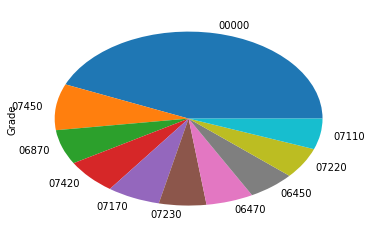

In [6]:
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie')

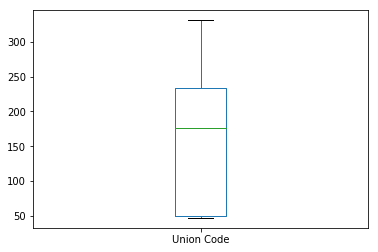

In [7]:
# 绘制箱体图
salary_ranges['Union Code'].value_counts().sort_values(ascending=False).head(5).plot(kind='box')

In [8]:
climate = pd.read_csv('../../dataset/GlobalLandTemperaturesByCity.csv')

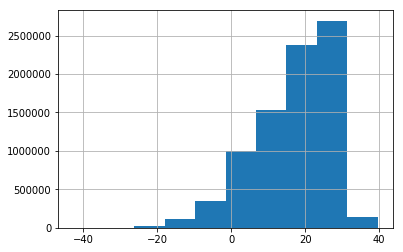

In [9]:
# 绘制直方图
climate['AverageTemperature'].hist()

In [10]:
# 移除缺失值
climate.dropna(axis=0,inplace=True)

In [11]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [12]:
# 只看中国，日期转换，将dt转换为日期，取年份，注意map的用法
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value:value.year)
climate_sub_china = climate.loc[climate['Country'] == 'China']
climate_sub_china['Century'] = climate_sub_china['year'].map(lambda x:int(x/100 + 1))

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
import matplotlib.pyplot as plt

In [14]:
# 设置显示的尺寸
plt.rcParams['figure.figsize'] = (4.0,4.0) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置interpolation style
plt.rcParams['image.cmap'] = 'gray' # 设置颜色 style
plt.rcParams['savefig.dpi'] = 100 # 图片像素
plt.rcParams['figure.dpi'] = 100 # 分辨率
plt.rcParams['font.family'] = ['Arial Unicode MS'] # 正常显示中文

C:\Users\jianghaitao1\AppData\Roaming\Python\Python36\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


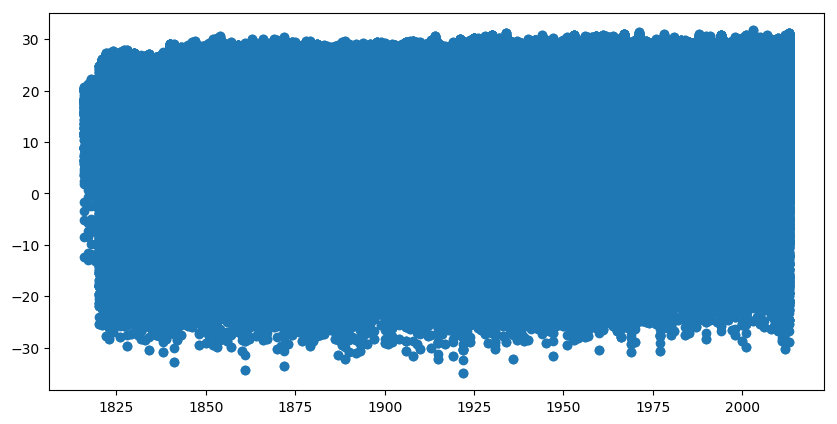

In [15]:
# 绘制散点图
x = climate_sub_china['year']
y = climate_sub_china['AverageTemperature']
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
plt.show()

In [16]:
import pandas as pd
X = pd.DataFrame({'city':['tokyo',None,'london','seattle','san fancisco','tokyo'],
'boolean':['y','n',None,'n','n','y'],
'ordinal_column':['somewhat like','like','somewhat like','like','somewhatlike','dislike'],
'quantitative_column':[1,11,-.5,10,None,20]})

In [17]:
# 填充分类变量(基于TransformerMixin的自定义填充器，用众数填充)
from sklearn.base import TransformerMixin
class CustomCategoryImputer(TransformerMixin):
    def __init__(self,cols=None):
        self.cols = cols
    def transform(self,df):
        X = df.copy()
        for col in self.cols:
            X[col].fillna(X[col].value_counts().index[0],inplace=True)
        return X
    def fit(self,*_):
        return self
# 调用自定义的填充器
cci = CustomCategoryImputer(cols=['city','boolean'])
cci.fit_transform(X)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,tokyo,n,like,11.0
2,london,n,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhatlike,NaN
5,tokyo,y,dislike,20.0


In [18]:
# 填充数值变量的空值
X = pd.DataFrame({'city':['tokyo',None,'london','seattle','san fancisco','tokyo'],
'boolean':['y','n',None,'n','n','y'],
'ordinal_column':['somewhat like','like','somewhat like','like','somewhatlike','dislike'],
'quantitative_column':[1,11,-.5,10,None,20]})

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
X

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,None,n,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhatlike,NaN
5,tokyo,y,dislike,20.0


In [21]:
class CustomQuantitativeImputer(TransformerMixin):
    def __init__(self,cols=None,strategy='mean'):
        self.cols = cols
        self.strategy = strategy
    def transform(self,df):
        X = df.copy()
        impute = SimpleImputer(strategy=self.strategy)
        for col in self.cols:
            X[col] = impute.fit_transform(X[[col]])
        return X
    def fit(self,*_):
        return self
# 调用自定义的填充器
cqi = CustomQuantitativeImputer(cols=['quantitative_column'], strategy='mean')
cqi.fit_transform(X)

,city,boolean,ordinal_column,quantitative_column
0,tokyo,y,somewhat like,1.0
1,None,n,like,11.0
2,london,None,somewhat like,-0.5
3,seattle,n,like,10.0
4,san fancisco,n,somewhatlike,8.3
5,tokyo,y,dislike,20.0


In [22]:
# 怎么画出堆积图来看占比关系
data_train = pd.read_csv('../../dataset/titanic/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\jianghaitao1\AppData\Roaming\Python\Python36\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


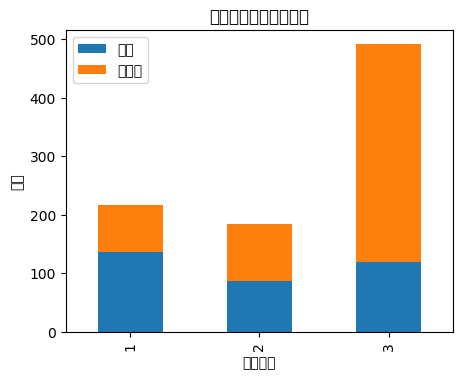

In [23]:
plt.rcParams['figure.figsize'] = (5.0, 4.0)
fig = plt.figure()
fig.set(alpha=0.8)
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("各乘客等级的获救情况")
plt.xlabel("乘客等级")
plt.ylabel("人数")
plt.show()

In [31]:
data = data_train.loc[:,['PassengerId','Name']]

In [32]:
import re

In [33]:
data['Title'] = data['Name'].map(lambda x:re.compile(",(.*?)\.").findall(x)[0])
data.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 the Countess      1
 Ms                1
 Lady              1
 Jonkheer          1
 Don               1
 Mme               1
 Capt              1
 Sir               1
Name: Title, dtype: int64

In [34]:
print(type(data['Title'][0]))

<class 'str'>


In [35]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
title_Dict

{'Capt': 'Officer',
 'Col': 'Officer',
 'Major': 'Officer',
 'Dr': 'Officer',
 'Rev': 'Officer',
 'Don': 'Royalty',
 'Sir': 'Royalty',
 'the Countess': 'Royalty',
 'Dona': 'Royalty',
 'Lady': 'Royalty',
 'Mme': 'Mrs',
 'Ms': 'Mrs',
 'Mrs': 'Mrs',
 'Mlle': 'Miss',
 'Miss': 'Miss',
 'Mr': 'Mr',
 'Master': 'Master',
 'Jonkheer': 'Master'}

In [37]:
data['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 the Countess      1
 Ms                1
 Lady              1
 Jonkheer          1
 Don               1
 Mme               1
 Capt              1
 Sir               1
Name: Title, dtype: int64

In [38]:
data['Title'] = data['Title'].map(title_Dict)
data['Title'].value_counts()

Series([], Name: Title, dtype: int64)

In [39]:
import seaborn as sns

In [40]:
house_price_train = pd.read_csv('../../dataset/house_price_train.csv')

In [41]:
all_features = house_price_train.drop(['SalePrice'],axis=1)

In [42]:
from scipy import stats

In [43]:
# 找出所有的数值型变量
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_features.columns:
    if all_features[i].dtypes in numeric_dtypes:
        numeric.append(i)
# 找出明显偏态的数值型变量
skew_features = all_features[numeric].apply(lambda x:stats.skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("本数据集中有{}个数值型变量的Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

本数据集中有24个数值型变量的Skew > 0.5 :


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
GarageYrBlt            NaN
d

In [44]:
from scipy.special import boxcox1p

In [45]:
# 通过Box-Cox转换，从而把倾斜的数据进行修正
for i in skew_index:
    all_features[i] = boxcox1p(all_features[i],stats.boxcox_normmax(all_features[i] + 1))

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [46]:
skew_features = all_features[numeric].apply(lambda x:stats.skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("本数据集中有{}个数值型变量的Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

本数据集中有15个数值型变量的Skew > 0.5 :


PoolArea         14.476284
3SsnPorch         7.744137
LowQualFinSF      7.392523
MiscVal           5.199813
KitchenAbvGr      3.953381
BsmtHalfBath      3.925130
ScreenPorch       3.328194
BsmtFinSF2        2.645006
EnclosedPorch     2.285796
2ndFlrSF          0.883107
WoodDeckSF        0.776782
HalfBath          0.711553
OpenPorchSF       0.624656
BsmtFullBath      0.590504
Fireplaces        0.514500
TotalBsmtSF       0.452285
MSSubClass        0.431145
BsmtFinSF1        0.381851
OverallCond       0.335371
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
BsmtUnfSF         0.053031
TotRmsAbvGrd      0.040872
FullBath          0.036524
GrLivArea         0.005867
Id                0.000000
1stFlrSF         -0.006599
LotArea          -0.185294
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
GarageYrBlt            NaN
d

C:\Users\jianghaitao1\AppData\Roaming\Python\Python36\site-packages\matplotlib\ticker.py:2206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


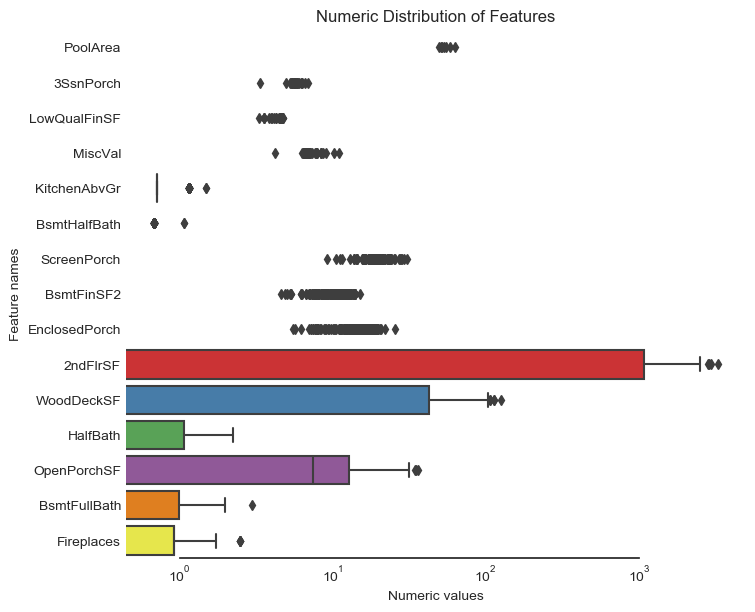

In [47]:
sns.set_style('white')
f,ax = plt.subplots(figsize=(8,7))
ax.set_xscale('log')
ax = sns.boxplot(data=all_features[skew_index],orient='h',palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)